# **DATA UNDERSTANDING**

## **Context**

Sebuah perusahaan bergerak di bidang jual-beli kendaraan classic ingin mengetahui gambaran umum tentang bisnis yang sedang mereka jalankan. Terdapat sebuah database yang menunjukan detail dari proses transaksi. Dari database tersebut, perusahaan ingin bisa mendapatkan insight yang dapat dijalankan, sehingga nantinya mereka dapat melakukan penerapan strategi yang tepat sasaran untuk memperoleh keuntungan yang lebih dari saat ini.

## **Database Information**

Sumber Database: https://www.mysqltutorial.org/wp-content/uploads/2018/03/mysqlsampledatabase.zip

Database yang dimiliki mempunyai 8 tabel, yaitu:
- Customers     : Menyimpan informasi tentang data pelanggan/customer.
- Products      : Menyimpan informasi tentang jenis produk/kendaraan.
- ProductLines  : Menyimpan informasi tentang kategori jenis produk/kendaraan beserta detail informasinya.
- Orders        : Menyimpan informasi jual-beli yang dilakukan oleh pelanggan.
- OrderDetails  : Menyimpan detail dari setiap pesanan yang dilakukan oleh pelanggan.
- Payments      : Menyimpan informasi pembayaran yang dilakukan oleh pelanggan berdasarkan akun yang digunakan.
- Employees     : Menyimpan semua informasi karyawan serta struktur organisasi, seperti siapa melapor kepada siapa.
- Offices       : Menyimpan data kantor penjualan.

Setiap tabel yang tertera pada database dapat terhubung, baik secara langsung maupun tidak langsung, sehingga setiap informasi dari database ini akan dapat saling berkaitan.

![](2021-12-28-07-00-35.png)

# **DATABASE**

## **Connecting To Database**

Bagian ini merupakan langkah awal untuk mulai melakukan proses analisis data. Pertama adalah membuat koneksi ke database di mana seperti yang sudah dijelaskan sebelumnya, database yang akan digunakan adalah database ``classicmodels``. Dengan melakukan koneksi ini, kita dapat mengakses seluruh tabel yang ada pada database.


In [ ]:
# Import Modules

import pandas as pd
import numpy as np
import mysql.connector as sqlcon

In [ ]:
# Connect To Database

mydb = sqlcon.connect(
    host = 'localhost',
    user = 'root',
    passwd = '12345',
    database = 'classicmodels'
)

Selain melakukan koneksi ke database, hal lain yang perlu dilakukan pada bagian awal ini adalah membuat sebuah fungsi untuk menuliskan ``query`` yang kemudian akan disimpan dalam bentuk DataFrame. Tujuannya adalah agar data hasil ``query`` yang dibuat dapat disimpan dan digunakan untuk keperluan analisis data. Nantinya, di sini terdapat 2 query untuk mengambil data-data yang ada di database, bukan hanya berasal dari 1 tabel, tapi juga akan melibatkan hubungan antar tabel.

In [ ]:
# Query Function

curs = mydb.cursor()

def sql_table (query) :
    curs.execute (query)
    result = curs.fetchall()
    tabel1 = pd.DataFrame(result, columns=curs.column_names)
    return tabel1

## **Data Detail & Keuntungan Transaksi**

Data pertama ini merupakan data utama yang nantinya akan dianalisa lebih lanjut. Data ini merupakan gabungan dari 4 tabel, yaitu tabel ```Costumer```, ```Orders```, ```OrderDetails```, dan ```Products```. Masing-masing dari setiap tabel tersebut diambil beberapa kolomnya dan tidak diambil secara keseluruhan. Informasi-informasi yang dianggap penting saja lah yang diambil. Informasi yang diambil antara lain adalah :
- customerNumber dari tabel customers
- customerName dari tabel customers
- addressLine1 dari tabel customers
- addressLine2 dari tabel customers
- city dari tabel customers
- state dari tabel customers
- country dari tabel customers
- orderNumber dari tabel orders
- status dari tabel orders
- requiredDate dari tabel orders
- shippedDate dari tabel orders
- quantityOrdered dari tabel orderdetails
- priceEach dari tabel orderdetails
- productCode dari tabel orderdetails
- productName dari tabel products
- productLine dari tabel products
- prodcutVendor dari tabel products
- quantityInStock dari tabel products
- buyPrice dari tabel products
- MSRP dari tabel products

Selain dari tabel, terdapat sebuah kolom juga yang dinamakan profitEach yang merupakan selisih antara priceEach (harga jual) dan buyPrice (Harga Beli); juga terdapat kolom yang bernama restStock yang merupakan hasil pengurangan antara quantityInStock dan quantityOrdered. 

Semua informasi tersebut kemudian dijadikan dalam sebuah DataFrame yang nantinya akan diolah informasinya.

In [ ]:
# Query 1

tabel1 = sql_table (
    '''
select c.customerNumber, c.customerName, c.addressLine1, c.addressLine2, c.city, c.state, c.country,
	o.orderNumber, o.status, o.requiredDate, o.shippedDate,
    od.quantityOrdered, od.priceEach, od.productCode,
    p.productName, p.productLine, p.productVendor, p.quantityInStock, p.buyPrice, p.MSRP,
	round((od.priceEach - p.buyPrice),1) profitEach, (p.quantityInStock - od.quantityOrdered) restStock
from customers c
left join orders o on c.customerNumber = o.customerNumber
left join orderdetails od on o.orderNumber = od.orderNumber
left join products p on od.productCode = p.productCode;
    '''
)
tabel1.head()

,customerNumber,customerName,addressLine1,addressLine2,city,state,country,orderNumber,status,requiredDate,...,priceEach,productCode,productName,productLine,productVendor,quantityInStock,buyPrice,MSRP,profitEach,restStock
0,103,Atelier graphique,"54, rue Royale",None,Nantes,None,France,10123.0,Shipped,2003-05-29,...,120.71,S18_1589,1965 Aston Martin DB5,Classic Cars,Classic Metal Creations,9042.0,65.96,124.44,54.8,9016.0
1,103,Atelier graphique,"54, rue Royale",None,Nantes,None,France,10123.0,Shipped,2003-05-29,...,114.84,S18_2870,1999 Indy 500 Monte Carlo SS,Classic Cars,Red Start Diecast,8164.0,56.76,132.00,58.1,8118.0
2,103,Atelier graphique,"54, rue Royale",None,Nantes,None,France,10123.0,Shipped,2003-05-29,...,117.26,S18_3685,1948 Porsche Type 356 Roadster,Classic Cars,Gearbox Collectibles,8990.0,62.16,141.28,55.1,8956.0
3,103,Atelier graphique,"54, rue Royale",None,Nantes,None,France,10123.0,Shipped,2003-05-29,...,43.27,S24_1628,1966 Shelby Cobra 427 S/C,Classic Cars,Carousel DieCast Legends,8197.0,29.18,50.31,14.1,8147.0
4,103,Atelier graphique,"54, rue Royale",None,Nantes,None,France,10298.0,Shipped,2004-10-05,...,105.86,S10_2016,1996 Moto Guzzi 1100i,Motorcycles,Highway 66 Mini Classics,6625.0,68.99,118.94,36.9,6586.0


## **Data Jenis Produk, Kuantitas, dan Total Harga Beli**

Data yang kedua ini merupakan informasi yang bisa menjadi data tambahan untuk melihat gambaran tentang data yang dimiliki. Data ini memuat jenis produk yang tersedia mulai dari trains hingga motorcyles, lengkap dengan banyaknya jenis produk, kuantitas, serta harga belinya. Dari sini bisa dilihat gambaran apakah kuantitas akan memberikan pengaruh terhadap harga beli. Dari data ini juga bisa dilihat keadaan stock barang, serta bagaimana gambaran jika suatu saat ingin menambah, entah itu jenis produk ataupun kuantitas dengan mempertimbangkan harganya.

In [ ]:
# Query 2 (Aggregating)

tabel2 = sql_table(
    '''
select 
	productLine Jenis_Produk, 
    count(productLine) Banyak_Produk, 
    sum(quantityInStock) JumlahQuantity, sum(buyPrice) JumlahHargaBeli
from products
group by productLine
order by Banyak_Produk;
    '''
)

tabel2.head()

,Jenis_Produk,Banyak_Produk,JumlahQuantity,JumlahHargaBeli
0,Trains,3,16696,131.77
1,Ships,9,26833,423.07
2,Trucks and Buses,11,35851,619.62
3,Planes,12,62287,595.55
4,Motorcycles,13,69401,658.91


In [ ]:
# Query 3 (CTE / Window Function)



# **DATA MANIPULATION**

Seperti yang telah dijelaskan sebelumnya, data yang digunakan untuk dianalisis adalah data pada ```tabel1```. Sebelum melakukan analisis lebih lanjut, hal yang harus dilakukan adalah mengecek informasi serta anomali pada data. Jika memang terdapat hal-hal yang dianggap 'kotor' pada data, maka yang perlu dilakukan adalah melakukan penanganan pada bagian tersebut. Pada bagian ini, data akan 'dibersihkan', sehingga output akhir yang diharapkan adalah terdapat sebuah dataset yang bersih yang dapat dianalisis lebih lanjut dengan menampilkan visualisasi, serta melihat statistics-nya.

## **Data Anomalies**

In [1]:
# Check Info Tabel1

tabel1.info()

NameError: ignored

## **Melihat Data Sekilas Dari General Info**

Mari sejenak melihat apa yang ditampilkan pada general info yang disajikan di atas. Terlihat bahwa secara keseluruhan terdapat 3020 baris data dengan total 22 kolom. Setiap kolomnya memiliki tipe data yang berbeda-beda. Ada object, integer, dan float. Oke, mari sejenak mengesampingkan tipe data. Mari berforkus pada non-null values atau data yang tersedia pada setiap kolomnya. Jika melihat informasi tersebut, tidak semua kolom atau feature yang memiliki data lengkap. Yang paling terlihat jomplang adalah pada ```adrressLine2``` dan ```states```. Kedua features tersebut kehilangan lebih dari 50% data. Selain dari itu, ada beberapa feature yang datanya juga missing, yang nantinya akan ditampilkan pada bagian berikutnya. **Kesimpulan pertama adalah bahwa terdapat *missing value* yang harus ditanggulangi.**

Fokus berikutnya adalah perhatikan pada features berikut ini: 
1. buyPrice
2. MSRP
3. profitEach
4. requeiredDate
5. shippedDate

Ada apa dengan kelima tipe data tersebut? Mari kita cari tahu. Yang pertama pada tipe data buyPrice, MSRP, dan juga profitEach. Ketiga feature ini merupakan feature yang seharusnya memiliki tipe data numerik (dibuktikan pada preview data di bagian sebelumnya), sedangkan yang terbaca tipe data dari ketiga feature ini adalah object. Artinya, ketiga feature ini tidak dianggap memiliki komponen data yang numerik. Tentu saja hal tersebut harus ditanggulangi, mengingat ke depannya data yang bersifat numerik ini akan digunakan.

Yang kedua, yaitu pada features requiredDate dan juga shippedDate. Kedua feature ini sama seperti sebelumnya, masih dibaca sebagai object yang seharusnya merupakan tipe data ```datetime```. Oleh karena itu, kedua features ini juga harus ditanggulangi dengan cara mengubah tipe datanya. Dari kedua penjelasan tersebut, maka **kesimpulan keduanya adalah terdapat features yang memiliki tipe data yang salah dan harus diubah sesuai dengan tipe data seharusnya.**

In [ ]:
# Check Missing Value Percentage

tabel1.isnull().sum()

customerNumber        0
customerName          0
addressLine1          0
addressLine2       2426
city                  0
state              1680
country               0
orderNumber          24
status               24
requiredDate         24
shippedDate         165
quantityOrdered      24
priceEach            24
productCode          24
productName          24
productLine          24
productVendor        24
quantityInStock      24
buyPrice             24
MSRP                 24
profitEach           24
restStock            24
dtype: int64

## **Missing Values**

Telah dijelaskan sebelumnya, terdapat beberapa feature yang memang memiliki missing values. Yang paling jadi sorotan adalah addressLine2 dan state yang memiliki total missing value yang lebih dari 50%. Artinya, jika missing valuenya dihilangkan dengan melihat row atau barisnya, setengah dari data yang dimiliki akan hilang, yang berarti akan mengakibatkan hilangnya banyak informasi. Tentu saja hal tersebut tidak dibenarkan. Untuk mengatasi hal tersebut, maka kedua feature tersebut akan dihapus dan tidak akan dimasukkan ke dalam data yang akan dianalisis.

Lalu, bagaimana dengan feature lainnya? Selain dari shippedDAte, hampir semua feature memiliki missing value sebanyak 24. Dari segi angka, bisa diasumsikan bahwa 24 data yang hilang tersebut adalah bagian dari row yang sama yang merupakan data yang betul-betul kosong dari database-nya. Sehingga, cara untuk mengatasinya cukup dengan melakukan drop data termasuk untuk shippedDate, meskipun total missing valuenya mencapai 165 data (hal tersebut karena 165 dari 3020 data hanya kurang lebih 5% data, sehingga tidak akan mengurangi informasi secara signifikan).

## **Handling Anomalies**

Setelah mengetahui hal-hal yang harus 'dibereskan' terlebih dahulu, maka pada bagian ini, hal-hal tersebut harus diatasi. Pertama, masalah missing value. Sebenarnya pada bagian sebelumnya sudah diberi tahu apa saja yang harus dilakukan untuk mengatasi masalah tersebut. Bagian pertama jelas akan dilakukan drop features addresLine2 dan state. Setelah drop kedua feature tersebut, barulah kemudian missing value dari setiap row-nya dihapus.

In [ ]:
# Remove Missing Value 1

tabel1.drop(['addressLine2', 'state'], axis=1, inplace = True)

In [ ]:
# Remove Missing Value 2

tabel1.dropna(inplace = True)

In [ ]:
# Recheck Info

tabel1.isnull().sum()

customerNumber     0
customerName       0
addressLine1       0
city               0
country            0
orderNumber        0
status             0
requiredDate       0
shippedDate        0
quantityOrdered    0
priceEach          0
productCode        0
productName        0
productLine        0
productVendor      0
quantityInStock    0
buyPrice           0
MSRP               0
profitEach         0
restStock          0
dtype: int64

## **Recheck Missing Value Information**

Setelah melakukan proses drop missing value, baik itu drop terhadap features maupun row, selanjutnya adalah melakukan pengecekan terhadap data yang dimiliki untuk memastikan apakah sudah tidak ada missing value lagi. Benar saja, jika melihat data pada output di atas, sudah tidak terdapat lagi missing value sama sekali, dan pada feature ```addressLine2``` serta ```state``` sudah tidak ada juga (karena sudah di-drop). Untuk masing-masing feature juga sudah memiliki 0 missing value yang berarti masalah missing value sudah teratasi.

## **Mengubah Tipe Data Yang Salah**

Oke, telah disebutkan juga sebelumnya bahwa ada tipe data yang tidak sesuai. Kelima features tersebut terlebih dahulu diubah agar fungsionalitasnya kembali ke hakekatnya. Numerik akan diperlakukan sebagai tipe data numerik, begitu juga dengan tipe data datetime. Tujuannya tentu saja agar features tersebut dapat dipergunakan sebagaimana mestinya.

In [ ]:
# Change Spesific Column To Date Time Format

tabel1['requiredDate'] = pd.to_datetime(tabel1['requiredDate'])
tabel1['shippedDate'] = pd.to_datetime(tabel1['shippedDate'])
tabel1['profitEach'] = pd.to_numeric(tabel1['profitEach'])
tabel1['MSRP'] = pd.to_numeric(tabel1['MSRP'])
tabel1['buyPrice'] = pd.to_numeric(tabel1['buyPrice'])

In [ ]:
# Recheck Info

tabel1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2855 entries, 0 to 3019
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   customerNumber   2855 non-null   int64         
 1   customerName     2855 non-null   object        
 2   addressLine1     2855 non-null   object        
 3   city             2855 non-null   object        
 4   country          2855 non-null   object        
 5   orderNumber      2855 non-null   float64       
 6   status           2855 non-null   object        
 7   requiredDate     2855 non-null   datetime64[ns]
 8   shippedDate      2855 non-null   datetime64[ns]
 9   quantityOrdered  2855 non-null   float64       
 10  priceEach        2855 non-null   object        
 11  productCode      2855 non-null   object        
 12  productName      2855 non-null   object        
 13  productLine      2855 non-null   object        
 14  productVendor    2855 non-null   object 

## **Recheck Data Information**

Bagian sebelumnya, 5 features yang memiliki tipe data yang salah sudah diubah ke dalam tipe data yang seharusnya. Untuk memastikannya, output di atas merupakan informasi umum yang kembali diperlihatkan untuk memastikan tipe data yang sudah diubah tersebut. Mari fokus ke kelima data yang sudah disebutkan sebelumnya. 

2 dari 5 features yang seharusnya bertipe data datetime, yaitu requiredDate dan shippedDate sudah menjadi tipe data datetime64, serta MSRP, buyPrice, dan juga profitEach juga yang awalnya bertipe data object sudah berubah menjadi float64. Dengan begini, perubahan yang dilakukan sebelumnya sudah terimplementasi dan anomali yang kedua sudah teratasi. 

In [ ]:
# Check Dupliacate

tabel1[tabel1.duplicated()]

,customerNumber,customerName,addressLine1,city,country,orderNumber,status,requiredDate,shippedDate,quantityOrdered,priceEach,productCode,productName,productLine,productVendor,quantityInStock,buyPrice,MSRP,profitEach,restStock


## **Data Duplicate**

Anomali berikutnya yang bisa ditemui adalah data yang duplikat. Tentu saja data yang bersifat duplikat ini akan menjadi sesuatu hal yang akan mengganggu proses analisis data. Jika memang nantinya terdapat data yang duplikat, sebaiknya data duplikatnya dihapus dan disisakan data yang unique saja. Untuk data saat ini, melihat output di atas artinya tidak terdapat data yang duplikat. Dengan begitu tidak perlu ada action yang dilakukan.

## **Feature 'ProcessingDate'**

Data awal menunjukan terdapat 2 features yang merupakan tipe data datetime. Artinya, kita dapat melakukan ekstraksi informasi tambahan dari kedua features tersebut. Sebelumnya, kita perlu tahu dulu definisi dari kedua tabel tersebut. requiredDate secara singkat dapat diartikan sebagai waktu atau kapan barang tersebut dibutuhkan, sedangkat shippedDate adalah waktu dikirimkannya barang tersebut. 

Melihat kedua definisi tersebut, sebuah informasi dapat diambil, yakni seberapa lama waktu proses barangnya dari waktu pengiriman hingga dibutuhkan. Oleh karena itu, untuk mendapatkan informasinya, maka perlu dilakukan pengurangan antara requiredDate dan juga shippedDate. Mungkin akan timbul pertanyaan, apakah waktu dapat dikurangkan? Jawabannya, bisa. Output yang keluar nantinya akan berupa selisih atau lamanya waktu proses tersebut dalam satuan hari.

In [ ]:
# Add New Column (Processing Day)

tabel1['ProcessingDate'] = tabel1['requiredDate'] - tabel1['shippedDate']
tabel1.sample(5)

,customerNumber,customerName,addressLine1,city,country,orderNumber,status,requiredDate,shippedDate,quantityOrdered,...,productCode,productName,productLine,productVendor,quantityInStock,buyPrice,MSRP,profitEach,restStock,ProcessingDate
258,124,Mini Gifts Distributors Ltd.,5677 Strong St.,San Rafael,USA,10282.0,Shipped,2004-08-26,2004-08-22,23.0,...,S18_2238,1998 Chrysler Plymouth Prowler,Classic Cars,Gearbox Collectibles,4724.0,101.51,163.73,45.9,4701.0,4 days
1867,299,"Norway Gifts By Mail, Co.",Drammensveien 126A,Oslo,Norway,10301.0,Shipped,2003-10-15,2003-10-08,32.0,...,S18_1589,1965 Aston Martin DB5,Classic Cars,Classic Metal Creations,9042.0,65.96,124.44,52.3,9010.0,7 days
2754,452,Mini Auto Werke,Kirchgasse 6,Graz,Austria,10392.0,Shipped,2005-03-18,2005-03-12,36.0,...,S18_3320,1917 Maxwell Touring Car,Vintage Cars,Exoto Designs,7913.0,57.54,99.21,40.7,7877.0,6 days
2960,495,Diecast Collectables,6251 Ingle Ln.,Boston,USA,10207.0,Shipped,2003-12-17,2003-12-11,40.0,...,S18_4027,1970 Triumph Spitfire,Classic Cars,Min Lin Diecast,5545.0,91.92,143.62,51.7,5505.0,6 days
1682,276,"Anna's Decorations, Ltd",201 Miller Street,North Sydney,Australia,10370.0,Shipped,2005-02-01,2005-01-25,49.0,...,S12_1666,1958 Setra Bus,Trucks and Buses,Welly Diecast Productions,1579.0,77.90,136.67,50.6,1530.0,7 days


## **Unique Value 'ProcessingDate'**

Oke, setelah membuat sebuah kolom baru yang bernama ProcessingDate sebagaimana yang sudah didefinisikan sebelumnya, mari kita cek bagaimana data tersebut. Jika melihat dari preview output sebelumnya, tidak ada keanehan. Lantas bagaimana jika kita melihat lebih dalam ke dalam feature baru ini? Berikut ini penampakan hasil yang memperlihatkan unique values beserta jumlah data di setiap unique values-nya.

In [ ]:
# Check Data Anomalies in Date Time Fomrat

tabel1['ProcessingDate'].value_counts()

3 days      486
4 days      441
5 days      396
6 days      383
7 days      322
2 days      303
9 days      162
8 days      135
1 days      128
0 days       70
-56 days     18
10 days       9
11 days       2
Name: ProcessingDate, dtype: int64

## **Anomali Pada Processing Date**

Melihat output unique values beserta dengan banyaknya data di setiap unique values tersebut, apakah terlihat sesuatu yang aneh? Yap benar, terdapat sebuah waktu yang menunjukan nilai minus, -56 days, dan terdapat 18 data di dalamnya. Ada apa? Sebenarnya ada 2 asumsi yang bisa diambil. Asumsi pertama adalah murni kesalahan input saat memasukan ke dalam database, atau asumsi yang kedua adalah pengirimannya mengalami keterlambatan. 

Untuk asumsi yang pertama, cara mengatasinya cukup dengan drop 18 data yang salah input. Dengan kata lain, kita menganggap bahwa data tersebut 'salah' dan dapat dibuang (karena jumlahnya yang tidak banyak). Untuk asumsi kedua, data ini bisa saja dipertahankan dan bisa dilakukan analisis lebih lanjut untuk mengetahui letak permasalahannya.

Di sini, asumsi yang akan digunakan adalah asumsi yang kedua, yaitu kita akan mengasumsikan terdapat keterlambatan dalam pengiriman. Nantinya, kita akan coba melakukan analisis untuk data ini.

In [ ]:
# Handling Date Time Format Anomalies (Check Data First)

tabel1[tabel1['ProcessingDate'] == '-56 days']

,customerNumber,customerName,addressLine1,city,country,orderNumber,status,requiredDate,shippedDate,quantityOrdered,...,productCode,productName,productLine,productVendor,quantityInStock,buyPrice,MSRP,profitEach,restStock,ProcessingDate
827,148,"Dragon Souveniers, Ltd.",Bronz Sok.,Singapore,Singapore,10165.0,Shipped,2003-10-31,2003-12-26,44.0,...,S12_1108,2001 Ferrari Enzo,Classic Cars,Second Gear Diecast,3619.0,95.59,207.80,72.7,3575.0,-56 days
828,148,"Dragon Souveniers, Ltd.",Bronz Sok.,Singapore,Singapore,10165.0,Shipped,2003-10-31,2003-12-26,34.0,...,S12_3148,1969 Corvair Monza,Classic Cars,Welly Diecast Productions,6906.0,89.14,151.08,34.8,6872.0,-56 days
829,148,"Dragon Souveniers, Ltd.",Bronz Sok.,Singapore,Singapore,10165.0,Shipped,2003-10-31,2003-12-26,27.0,...,S12_3891,1969 Ford Falcon,Classic Cars,Second Gear Diecast,1049.0,83.05,173.02,69.2,1022.0,-56 days
830,148,"Dragon Souveniers, Ltd.",Bronz Sok.,Singapore,Singapore,10165.0,Shipped,2003-10-31,2003-12-26,48.0,...,S12_4473,1957 Chevy Pickup,Trucks and Buses,Exoto Designs,6125.0,55.70,118.50,53.3,6077.0,-56 days
831,148,"Dragon Souveniers, Ltd.",Bronz Sok.,Singapore,Singapore,10165.0,Shipped,2003-10-31,2003-12-26,29.0,...,S18_2238,1998 Chrysler Plymouth Prowler,Classic Cars,Gearbox Collectibles,4724.0,101.51,163.73,32.8,4695.0,-56 days
832,148,"Dragon Souveniers, Ltd.",Bronz Sok.,Singapore,Singapore,10165.0,Shipped,2003-10-31,2003-12-26,46.0,...,S18_2319,1964 Mercedes Tour Bus,Trucks and Buses,Unimax Art Galleries,8258.0,74.86,122.73,45.4,8212.0,-56 days
833,148,"Dragon Souveniers, Ltd.",Bronz Sok.,Singapore,Singapore,10165.0,Shipped,2003-10-31,2003-12-26,31.0,...,S18_2432,1926 Ford Fire Engine,Trucks and Buses,Carousel DieCast Legends,2018.0,24.92,60.77,35.9,1987.0,-56 days
834,148,"Dragon Souveniers, Ltd.",Bronz Sok.,Singapore,Singapore,10165.0,Shipped,2003-10-31,2003-12-26,47.0,...,S18_3232,1992 Ferrari 360 Spider red,Classic Cars,Unimax Art Galleries,8347.0,77.90,169.34,76.2,8300.0,-56 days
835,148,"Dragon Souveniers, Ltd.",Bronz Sok.,Singapore,Singapore,10165.0,Shipped,2003-10-31,2003-12-26,50.0,...,S18_3259,Collectable Wooden Train,Trains,Carousel DieCast Legends,6450.0,67.56,100.84,17.2,6400.0,-56 days
836,148,"Dragon Souveniers, Ltd.",Bronz Sok.,Singapore,Singapore,10165.0,Shipped,2003-10-31,2003-12-26,28.0,...,S18_4027,1970 Triumph Spitfire,Classic Cars,Min Lin Diecast,5545.0,91.92,143.62,31.6,5517.0,-56 days


## **Preview Cleaned Data**

Setelah semua anomalies sudah diselesaikan, artinya data yang dimiliki sudah bersih. Di bawah ini adalah sample data yang dianggap sudah bersih setelah melewati proses-proses sebelumnya.

In [ ]:
# Clean Data

tabel1.sample(20)

,customerNumber,customerName,addressLine1,city,country,orderNumber,status,requiredDate,shippedDate,quantityOrdered,...,productCode,productName,productLine,productVendor,quantityInStock,buyPrice,MSRP,profitEach,restStock,ProcessingDate
2461,385,Cruz & Sons Co.,15 McCallum Street,Makati City,Philippines,10108.0,Shipped,2003-03-12,2003-03-08,43.0,...,S18_3782,1957 Vespa GS150,Motorcycles,Studio M Art Models,7689.0,32.95,62.17,19.9,7646.0,4 days
1841,298,"Vida Sport, Ltd",Grenzacherweg 237,Genève,Switzerland,10287.0,Shipped,2004-09-06,2004-09-01,44.0,...,S18_1889,1948 Porsche 356-A Roadster,Classic Cars,Gearbox Collectibles,8826.0,53.90,77.00,7.7,8782.0,5 days
753,145,Danish Wholesale Imports,Vinbæltet 34,Kobenhavn,Denmark,10327.0,Resolved,2004-11-19,2004-11-13,45.0,...,S18_2581,P-51-D Mustang,Planes,Gearbox Collectibles,992.0,49.00,84.48,25.3,947.0,6 days
2446,382,Salzburg Collectables,Geislweg 14,Salzburg,Austria,10419.0,Shipped,2005-05-28,2005-05-19,39.0,...,S18_1889,1948 Porsche 356-A Roadster,Classic Cars,Gearbox Collectibles,8826.0,53.90,77.00,13.9,8787.0,9 days
2567,406,Auto Canal+ Petit,"25, rue Lauriston",Paris,France,10252.0,Shipped,2004-06-04,2004-05-29,41.0,...,S18_3482,1976 Ford Gran Torino,Classic Cars,Gearbox Collectibles,9127.0,73.49,146.99,72.0,9086.0,6 days
464,141,Euro+ Shopping Channel,"C/ Moralzarzal, 86",Madrid,Spain,10128.0,Shipped,2003-06-12,2003-06-11,43.0,...,S18_4522,1904 Buick Runabout,Vintage Cars,Exoto Designs,8290.0,52.66,87.77,24.6,8247.0,1 days
2598,412,"Extreme Desk Decorations, Ltd",101 Lambton Quay,Wellington,New Zealand,10268.0,Shipped,2004-07-18,2004-07-14,30.0,...,S24_3969,1936 Mercedes Benz 500k Roadster,Vintage Cars,Red Start Diecast,2081.0,21.75,41.03,16.0,2051.0,4 days
630,141,Euro+ Shopping Channel,"C/ Moralzarzal, 86",Madrid,Spain,10379.0,Shipped,2005-02-18,2005-02-11,27.0,...,S18_2248,1911 Ford Town Car,Vintage Cars,Motor City Art Classics,540.0,33.30,60.54,17.6,513.0,7 days
648,141,Euro+ Shopping Channel,"C/ Moralzarzal, 86",Madrid,Spain,10383.0,Shipped,2005-03-02,2005-02-25,24.0,...,S18_3140,1903 Ford Model A,Vintage Cars,Unimax Art Galleries,3913.0,68.30,136.59,57.4,3889.0,5 days
2950,489,"Double Decker Gift Stores, Ltd",120 Hanover Sq.,London,UK,10186.0,Shipped,2003-11-20,2003-11-18,28.0,...,S72_1253,Boeing X-32A JSF,Planes,Motor City Art Classics,4857.0,32.77,49.66,9.9,4829.0,2 days


## **General Info Cleaned Data**

In [ ]:
# Check Some Info

listItem = []
for col in tabel1.columns :
    listItem.append([col, tabel1[col].dtype, len(tabel1),tabel1[col].isna().sum(), round((tabel1[col].isna().sum()/len(tabel1[col])) * 100,2),
                    tabel1[col].nunique(), list(tabel1[col].drop_duplicates().sample(2).values)])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Data Type', 'Data Count', 'Missing Value', 
    'Missing Value Percentage', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Data Type,Data Count,Missing Value,Missing Value Percentage,Number of Unique,Unique Sample
0,customerNumber,int64,2855,0,0.0,98,"[173, 495]"
1,customerName,object,2855,0,0.0,98,"[Signal Collectibles Ltd., Royal Canadian Coll..."
2,addressLine1,object,2855,0,0.0,98,"[Drammensveien 126A, 2440 Pompton St.]"
3,city,object,2855,0,0.0,78,"[Paris, Boston]"
4,country,object,2855,0,0.0,22,"[Norway , Belgium]"
5,orderNumber,float64,2855,0,0.0,312,"[10192.0, 10274.0]"
6,status,object,2855,0,0.0,4,"[Resolved, Shipped]"
7,requiredDate,datetime64[ns],2855,0,0.0,255,"[2003-10-15T00:00:00.000000000, 2004-06-04T00:..."
8,shippedDate,datetime64[ns],2855,0,0.0,247,"[2004-01-12T00:00:00.000000000, 2003-02-12T00:..."
9,quantityOrdered,float64,2855,0,0.0,57,"[31.0, 55.0]"


## **Buy Price Berdasarkan Status**

In [ ]:
# Groupping and Aggregating

tabel1[['buyPrice','status']].groupby('status').describe()


buyPrice                                                           
             count       mean        std    min     25%    50%    75%     max
status                                                                       
Cancelled     23.0  58.791304  22.246411  16.24  43.790  58.73  71.04   98.30
Disputed      14.0  56.962143  23.258696  24.23  35.645  61.51  68.31   93.89
Resolved      47.0  49.120000  19.507698  16.24  33.790  49.00  60.32  103.42
Shipped     2771.0  54.680162  22.210561  15.91  34.170  53.93  68.99  103.42

Terdapat sebuah feature yang bernama 'status' pada dataset. Feature ini merupakan daftar status dari transaksi yang ada pada database. Status sendiri memiliki 4 golongan/kategori, ada 'Canceled', 'Disputed', 'Resolved', dan juga 'Shipped'. Tentu saja, secara kuantitas status 'Shipped' akan lebih banyak dibandingkan dengan yang lainnya. Total terdapat 2753 kendaraan yang berstatus dikirim. Jika melihat dari buyPrice, rata-rata nilai beli barang yang dikirim tersebut, yakni sebesar 54.63 juta US Dollar, nilainya bukanlah yang terbesar di antara ketiga status lainnya. Artinya, barang-barang yang sudah dikirim ini memiliki rataan nilai beli yang tidak begitu besar, namun juga tidak kecil.

Melihat status 'Canceled', terdapat 23 barang yang akhirnya tidak jadi terjual dan di-cancel. Tentu saja ini memberikan dampak yang cukup besar melihat secara rataan nilai beli barang yang di-cancel ini menjadi yang terbesar di antara yang lainnya, yaitu sebesar 58.79 juta US Dollar. Bayangkan ada 23 barang (kendaraan) yang memiliki harga tersebut. Dengan begitu, perusahaan dapat menderita kerugian yang cukup besar karena barang yang di-cancel ini. Untuk mengatasi dan menghindari kerugian, sebaiknya ke depannya perusahaan dapat menerapkan sistem DP atau uang tanda terima agar ketika barang yang sudah terlanjur di-order tidak jadi untuk dipesan, perusahaan tidak menderita kerugian yang besar.

Status 'Disputed' atau yang sedang bermasalah/bersengketa ini tidak terlalu banya, yakni sebanyak 14. Meski begitu, rataan harga beli barangnya juga terbilang bersar, bahkan lebih besar dari status 'Shipped' dan juga 'Resolved', yakni sebesar 56.96 juta US Dollar. Sebaiknya, permasalahan dalam transaksi ini segera diselesaikan. Tujuannya jelas, jika selesai dengan arah yang positif, tentu perusahaan akan mendapatkan profit, sedangkan jika akhirnya ke arah yang negatif, perusahaan dapat segera dapat mengambil langkah tegas untuk menutupi kerugian yang diterima.

Status terakhir, yakni 'Resolved' atau terselesaikan merupakan status yang diinginkan. Sebenarnya status 'Shipped' adalah setengah bagian dari status 'Resolved' ini karena sudah dalam tahapan pengiriman. Rataan nilai beli dari kendaraan yang sudah berhasil dijual ini tidak terlalu besar. Namun, bayangkan jika nilai jualnya tinggi? Tentu saja perusahaan akan mendapatkan untung. Keuntungan ini dapat digunakan untuk menutupi kerugian yang didapatkan dari status 'Canceled', sehingga perputaran uang dari perusahaan tetap berjalan dan pada akhirnya perusahaan tetap akan mendapatkan untung dari keseluruhan hasil penjualannya. 

## **Data Outlier**

In [ ]:
# Outlier Check With Function

Q1_amount = tabel1['profitEach'].describe()['25%']
Q3_amount = tabel1['profitEach'].describe()['75%']
iqr = Q3_amount - Q1_amount

outlier_index = tabel1[(tabel1['profitEach'] < Q1_amount - (1.5 * iqr)) | (tabel1['profitEach']> Q3_amount + (1.5 * iqr)) ].index
not_outlier_index = tabel1[(tabel1['profitEach'] > Q1_amount - (1.5 * iqr)) & (tabel1['profitEach']< Q3_amount + (1.5 * iqr)) ].index
tabel1.loc[outlier_index]

,customerNumber,customerName,addressLine1,city,country,orderNumber,status,requiredDate,shippedDate,quantityOrdered,...,productCode,productName,productLine,productVendor,quantityInStock,buyPrice,MSRP,profitEach,restStock,ProcessingDate
25,112,Signal Gift Stores,8489 Strong St.,Las Vegas,USA,10278.0,Shipped,2004-08-16,2004-08-09,42.0,...,S18_3232,1992 Ferrari 360 Spider red,Classic Cars,Unimax Art Galleries,8347.0,77.90,169.34,89.8,8305.0,7 days
55,114,"Australian Collectors, Co.",636 St Kilda Road,Melbourne,Australia,10223.0,Shipped,2004-02-29,2004-02-24,49.0,...,S10_4698,2003 Harley-Davidson Eagle Drag Bike,Motorcycles,Red Start Diecast,5582.0,91.02,193.66,98.8,5533.0,5 days
71,114,"Australian Collectors, Co.",636 St Kilda Road,Melbourne,Australia,10342.0,Shipped,2004-12-01,2004-11-29,30.0,...,S18_3232,1992 Ferrari 360 Spider red,Classic Cars,Unimax Art Galleries,8347.0,77.90,169.34,89.8,8317.0,2 days
79,114,"Australian Collectors, Co.",636 St Kilda Road,Melbourne,Australia,10347.0,Shipped,2004-12-07,2004-11-30,30.0,...,S10_1949,1952 Alpine Renault 1300,Classic Cars,Classic Metal Creations,7305.0,98.58,214.30,90.0,7275.0,7 days
117,119,La Rochelle Gifts,"67, rue des Cinquante Otages",Nantes,France,10375.0,Shipped,2005-02-10,2005-02-06,45.0,...,S12_1099,1968 Ford Mustang,Classic Cars,Autoart Studio Design,68.0,95.34,194.57,89.5,23.0,4 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2876,475,West Coast Collectables Co.,3675 Furth Circle,Burbank,USA,10215.0,Shipped,2004-02-08,2004-02-01,35.0,...,S10_1949,1952 Alpine Renault 1300,Classic Cars,Classic Metal Creations,7305.0,98.58,214.30,107.2,7270.0,7 days
2893,484,"Iberia Gift Imports, Corp.","C/ Romero, 33",Sevilla,Spain,10184.0,Shipped,2003-11-22,2003-11-20,28.0,...,S18_3232,1992 Ferrari 360 Spider red,Classic Cars,Unimax Art Galleries,8347.0,77.90,169.34,88.1,8319.0,2 days
2907,486,Motor Mint Distributors Inc.,11328 Douglas Av.,Philadelphia,USA,10109.0,Shipped,2003-03-19,2003-03-11,46.0,...,S18_3232,1992 Ferrari 360 Spider red,Classic Cars,Unimax Art Galleries,8347.0,77.90,169.34,83.0,8301.0,8 days
2918,486,Motor Mint Distributors Inc.,11328 Douglas Av.,Philadelphia,USA,10331.0,Shipped,2004-11-23,2004-11-23,27.0,...,S18_3232,1992 Ferrari 360 Spider red,Classic Cars,Unimax Art Galleries,8347.0,77.90,169.34,91.4,8320.0,0 days


## **Membuat Feature 'Profit'**

In [ ]:
# Adding New Column With Lambda Function

tabel1['Profit'] = tabel1[['profitEach', 'quantityOrdered']].apply(lambda x:(x['profitEach'] * x['quantityOrdered']), axis = 1)
tabel1.head()

,customerNumber,customerName,addressLine1,city,country,orderNumber,status,requiredDate,shippedDate,quantityOrdered,...,productName,productLine,productVendor,quantityInStock,buyPrice,MSRP,profitEach,restStock,ProcessingDate,Profit
0,103,Atelier graphique,"54, rue Royale",Nantes,France,10123.0,Shipped,2003-05-29,2003-05-22,26.0,...,1965 Aston Martin DB5,Classic Cars,Classic Metal Creations,9042.0,65.96,124.44,54.8,9016.0,7 days,1424.8
1,103,Atelier graphique,"54, rue Royale",Nantes,France,10123.0,Shipped,2003-05-29,2003-05-22,46.0,...,1999 Indy 500 Monte Carlo SS,Classic Cars,Red Start Diecast,8164.0,56.76,132.00,58.1,8118.0,7 days,2672.6
2,103,Atelier graphique,"54, rue Royale",Nantes,France,10123.0,Shipped,2003-05-29,2003-05-22,34.0,...,1948 Porsche Type 356 Roadster,Classic Cars,Gearbox Collectibles,8990.0,62.16,141.28,55.1,8956.0,7 days,1873.4
3,103,Atelier graphique,"54, rue Royale",Nantes,France,10123.0,Shipped,2003-05-29,2003-05-22,50.0,...,1966 Shelby Cobra 427 S/C,Classic Cars,Carousel DieCast Legends,8197.0,29.18,50.31,14.1,8147.0,7 days,705.0
4,103,Atelier graphique,"54, rue Royale",Nantes,France,10298.0,Shipped,2004-10-05,2004-10-01,39.0,...,1996 Moto Guzzi 1100i,Motorcycles,Highway 66 Mini Classics,6625.0,68.99,118.94,36.9,6586.0,4 days,1439.1


# **DATA VISUALIZATION & STATISTICS**

## **Top 5 Loyal Costumer**

Setelah mendapatkan data yang sudah 'bersih' dan siap untuk digunakan, masuklah kita ke bagian analisis data dengan menggunakan visual sebagai medianya. Di sini, kita akan melakukan visualisasi data untuk mendapatkan beberapa insight yang kemudian dapat menjadi landasan dalam pengambilan keputusan dan penyusunan strategi yang kuat untuk mendapatkan profit yang sebesar-besarnya dengan kerugian yang minim.

In [ ]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
fig = px.bar(tabel1['customerName'].value_counts().head(),
            title = 'Loyal Costumer')
fig.show()

Bisnis jual beli kendaraan tentu saja akan lebih banyak melibatkan perusahaan yang terafiliasi dibandingkan dengan perseorangan. Tentu saja, segmentasi customer juga akan lebih condong ke arah perusahaan. Mari sedikit melihat data yang ada. Dari total sekitar 2000an transaksi yang terjadi pada tahun 2003 hingga pertengahan 2005, dominasi pembeli terloyal jatuh pada perusahaan-perusahaan besar yang bergerak di bidang otomotif. Dalam rentan waktu 2 tahun setengah, 2 perusahaan yakni Euro+ Shopping Channel dan juga Mini Gift Distributors Ltd merupakan perusahaan yang paling loyal dengan total transaksi lebih dari 150 kali. Artinya, kedua perusahaan ini adalah pembeli setia kendaraan-kendaraan. Autralian Collectors, Co ; AV Stores, Co; dan Muscle Machine Inc juga termasuk ke dalam jajaran top 5 loyal customers. Meski begitu, jumlah transaksi yang dilakukan oleh ketiga perusahaan ini masih kalah jauh dari 2 perusahaan sebelumnya.

Oke, melihat adanya sektor di mana terdapat pelanggan yang sangat loyal, berarti terdapat peluang untuk menawarkan barang-barang baru kepada mereka. Perusahaan distributor kendaraan ini dapat melebihkan promosi dan memberikan special offer kepada kedua pelanggan loyal ini. Artinya, jika ada barang baru yang masuk dalam segmentasi pasar dari Euro+ Shopping Channel dan juga Mini Gift Distributors Ltd dapat ditawarkan kepada mereka secara langsung. Penawaran ini dilakukan agar kedua customer yang sudah memiliki kepercayaan terhadap perusahaan ini tidak akan berpindah ke lain hati dan keduanya semakin bisa lebih sering melakukan transaksi.

Untuk customer-customer lainnya, dapat dilihat terlebih dahulu history transaksinya seperti apa. Selain memperhatikan pelanggan loyal, pelanggan yang memiliki jumlah transaksi yang tidak terlalu banyak juga perlu diperhatikan. Tujuannya apa? Tentu saja agar mereka tidak 'churn' ke kompetitor.

## **Negara Pemesan Kendaraan Terbanyak**

C:\Users\achma\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



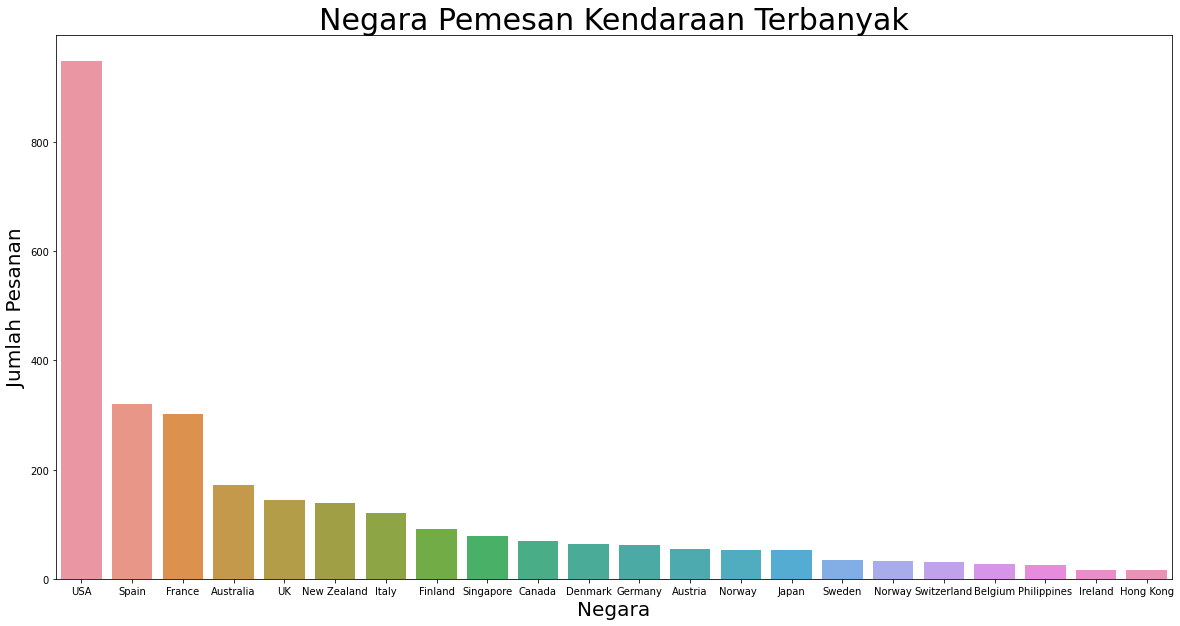

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(tabel1['country'],
            order = tabel1['country'].value_counts().index)
plt.xlabel('Negara', size = 20)
plt.ylabel('Jumlah Pesanan', size = 20)
plt.title ('Negara Pemesan Kendaraan Terbanyak', size = 30)
plt.show()

Setelah sebelumnya telah mengetahui pelanggan atau customer yang loyal, berikutnya mari ktia lihat negara mana saja yang menjadi pemesan kendaraan terbanyak. Jika melihat data dari grafik di atas, terlihat jelas bahwa USA atau Amerika Serikat menjadi negara tujuan pemesan terbanyak. Tentu saja hal tersebut sangat mungkin diakrenakan status Amerika sebagai negara adidaya yang pastinya akan lebih banyak menjadi pemasok kendaraan daripada negara-negara lainnya. Luar biasanya, tingkat pembelian yang berasal dari negara USA mencapai lebih dari 800, yang berarti 2 kali lipat lebih banyak dari negara lain. Bandingkan saja, Spain dan France yang menjadi negara tujuan pembelian kendaraan terbanyak kedua dan ketiga, bahkan tidak sampai setengah dari total pembelian dari negara Amerika.

Jika mempertimbangkan hal tersebut, maka perusahaan pemasok kendaraan ini harus sangat mempertimbangkan untuk paling tidak membangun pusat produksi dan kantor di 3 negara, yaitu USA, Spain, dan France. Tujuannya jelas, yaitu agar proses produksi dan distribusi dari negara tujuan pembeli dapat dilakukan dalam waktu cepat. Hal tersebut akan meningkatkan keuntungan jika pasar dari pelanggan ini tidak bergeser. Rasanya juga cukup berat untuk menggeser USA, melihat jumlah pembeliannya yang sangat banyak. 

Strategi nyata yang paling bisa diambil adalah:
1. Membangun kantor pusat dan pusat produksi di USA (yang notabennya merupakan sumber pelanggan terbanyak).
2. Membangun kantor cabang level II (setingkat di bawah kantor pusat) di Spain dan France.
3. Paling tidak, di setiap benua terdapat 1 kantor cabang dan 1 tempat produksi kendaraan. Tujuannya adalah agar pasar tetap berkembang dan mencakup seluruh dunia.

## **Status Pengiriman Barang**

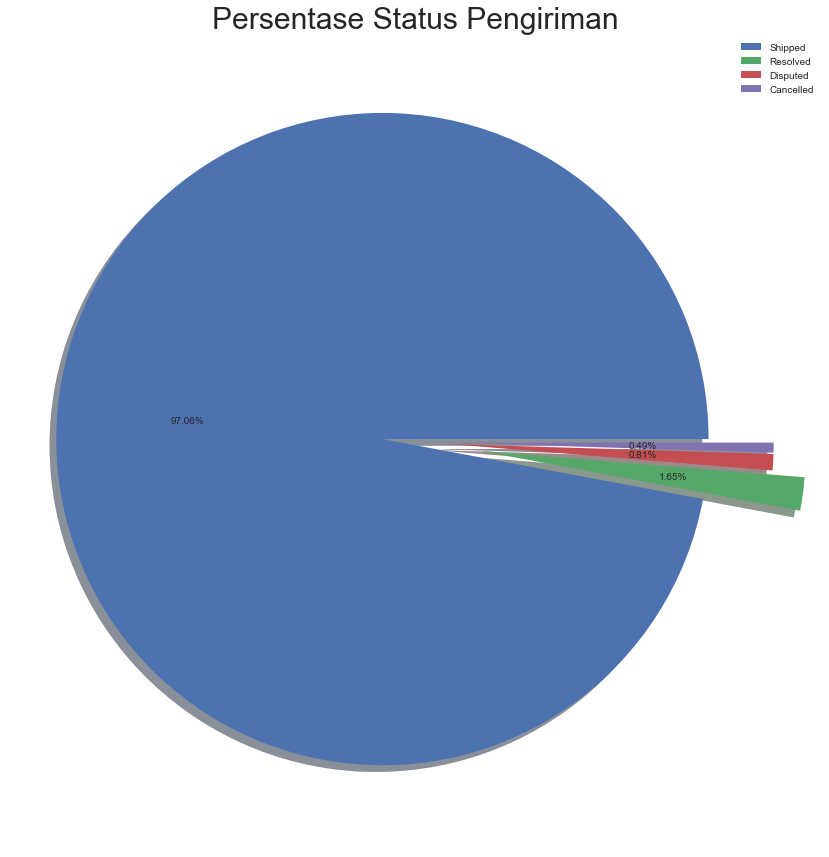

In [ ]:
# Pie Chart Status

plt.style.use('seaborn')
plt.figure(figsize=(20,15))
plt.pie(tabel1['status'].value_counts().values, 
        autopct='%.2f%%', explode= (0.1,0.2,0.1,0.1), shadow=True)
plt.title ('Persentase Status Pengiriman', size = 30)
plt.legend(tabel1['status'].unique())
plt.show()

Permasalahan status sebenarnya sudah dijelaskan pada bagian sebelumnya. Namun, mari kita lihat dari sudut pandang yang lain. Seperti yang tertera pada grafik di atas bahwa 97.06% dari total transaksi merupakan transaksi yang sedang dalam status 'shipped' atau dikirim. Melihat angka tersebut, bisa disimpulkan bahwa hampir semua prosesnya sudah dalam tahapan pengiriman. Yang menjadi masalah di sini, walau sedikit, tapi terdapat 0.49% transaksi yang berstatus 'canceled' dan 0.81% berstatus 'Disputed'. Jika ditotal, keduanya memiliki persentase yang berada di kisaran kurang lebih 1%. Angka tersebut terbilang kecil, tapi perlu diketahui bahwa 1% ini juga tetap menimbulkan dampak kerugian. 

Perusahaan harus segera mengidentifikasi daftar transaksi yang akhirnya memiliki 2 status tersebut. Jika tidak, akan ada ancaman ke depannya jumlahnya bisa terus bertambah. Angka tersebut sebisa mungkin diminimalisasi oleh perusahaan, bahkan jika memungkinkan tidak ada lagi status yang bersifat 'Canceled' atau 'Disputed', sehingga profit yang didapatkan dapat maksimal.

## **Product Terlaris**

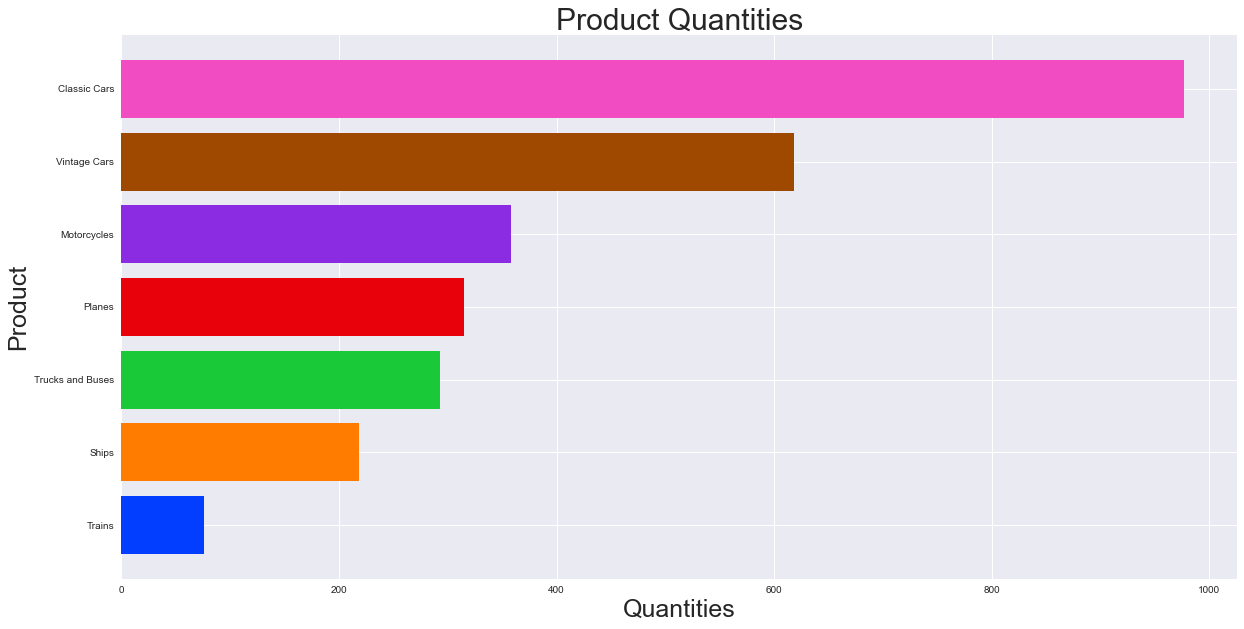

In [ ]:
# Product Line Quantities

productQuanti = tabel1[['productLine', 'productName']].groupby(['productLine']).count().sort_values('productName')
x = productQuanti.index
y = productQuanti['productName']

plt.style.use('seaborn')
plt.figure(figsize = (20,10))
plt.barh(x,y, color = sns.color_palette('bright'))
plt.title('Product Quantities', size = 30)
plt.xlabel('Quantities', size = 25)
plt.ylabel('Product', size = 25)
plt.show()

Jika sebelumnya berfokus pada pelanggan/customer, maka barikutnya mari kita alihkan fokus pada produk yang dijual dan ditawarkan. Terlihat top 3 product yang paling banyak dipesan adalah classic cars, vintage cars, dan motorcyles. Jika melihat jenis kendaraannya, ketiga kendaraan yang menjadi top 3 product ini adalah kendaraan yang normal atau pada umumnya digunakan. Hal tersebut menjadi alasan wajar kenapa ketiga product ini menjadi yang paling banyak dibeli. 

Melihat keadaan tersebut, pihak perusahaan dapat menjadikan produksi classic cars, vintage cars, dan motorcyles menjadi produksi yang diprioritaskan. Lakukan riset terlebih dahulu di setiap negara untuk mementukan stok pasaran yang bisa dibuat sehingga stock akan berbanding lurus dengan demand.

Jika melihat peminat trains yang tidak terlalu banyak (hanya 76 pesanan selama 3 tahun), pihak perusahaan harus setidaknya mengambil langkah jelas. Perusahaan dapat melakukan beberapa kebijakan, seperti stop produksi kereta atau coba menawarkan produk kereta ini ke negara-negara yang tepat, seperti Jerman, Rusia, Spanyol, atau negara-negara yang memang menggunakan kereta sebagai salah satu moda utama transportasi umum. 

## **Profit Penjualan Kendaraan**

In [ ]:
yearprof = tabel1[['shippedDate', 'quantityOrdered' ,'Profit']].groupby(pd.DatetimeIndex(tabel1['shippedDate']).year).sum()
yearprof

,quantityOrdered,Profit
shippedDate,,
2003,35889.0,1304450.1
2004,47903.0,1749780.4
2005,16323.0,587935.4


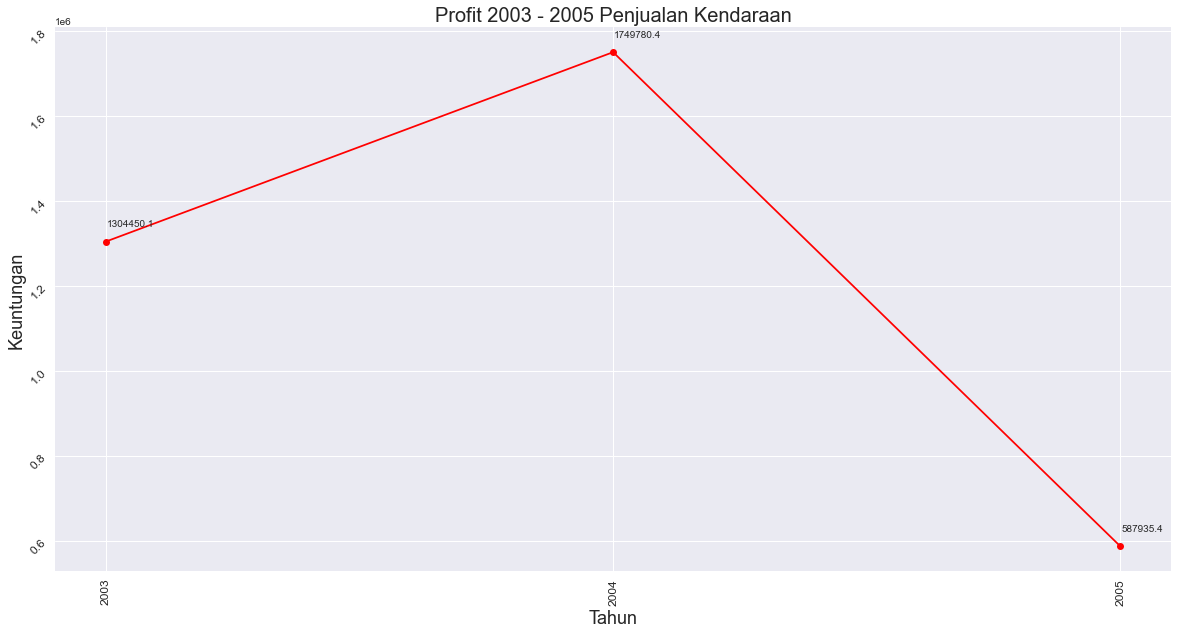

In [ ]:
# Line Plot Year By Year Profit

plt.style.use('seaborn')
plt.figure(figsize=(20,10))
plt.plot(yearprof.index, yearprof['Profit'], 'ro-')
plt.title('Profit 2003 - 2005 Penjualan Kendaraan', size = 20)
plt.xlabel('Tahun', size = 18)
plt.ylabel('Keuntungan', size = 18)
plt.xticks(yearprof.index, rotation = 90, size = 12)
plt.yticks(rotation = 45, size = 12)

for x,y in zip(yearprof.index, round(yearprof['Profit'],1)) :
    plt.annotate(y,
    (x,y),
    textcoords = 'offset pixels',
    xytext = (1,15))

plt.show()

Database yang dimiliki saat ini adalah database transaksi penjualan kendaraan dalam rentan tahun 2003 hingga pertengahan tahun 2005. Mari coba kita lihat total profit yang didapatkan oleh perusahaan dari tahun ke tahun. 

Terlihat jelas pada grafik, penjualan terbesar secara total dalam 1 tahun terjadi pada tahun 2004 dengan total nilai penjualan sebesar 1.749.780,4 US Dollar. Secara grafik, dapat dilihat bahwa pada tahun 2005 nilai penjualan cukup menurun. Meski begitu, kita tidak bisa langsung menarik kesimpulan bahwa tahun 2005 ini tidak berjalan dengan baik masalah penjualannya. Hal tersebut dikarenakan dari database yang dimiliki, tahun 2005 ini belum sepenuhnya selesai. Grafik di bawah akan menjelaskan bahwa tahun 2005 berakhir sampai bulan ke 5 saja. Artinya, masih ada 7 bulan pada tahun tersebut, di mana datanya masih belum tersedia.

Rata-rata puncak profit juga diperoleh pada bulan ke-4, terutama pada tahun 2005. Kenaikan profit dari bulan ke-3 ke bulan ke-4 menjadi sangat signifikan. Bukan tidak mungkin, dengan trend positif seperti demikian, tahun 2005 dapat menghasilkan profit yang jauh lebih besar daripada sebelumnya.

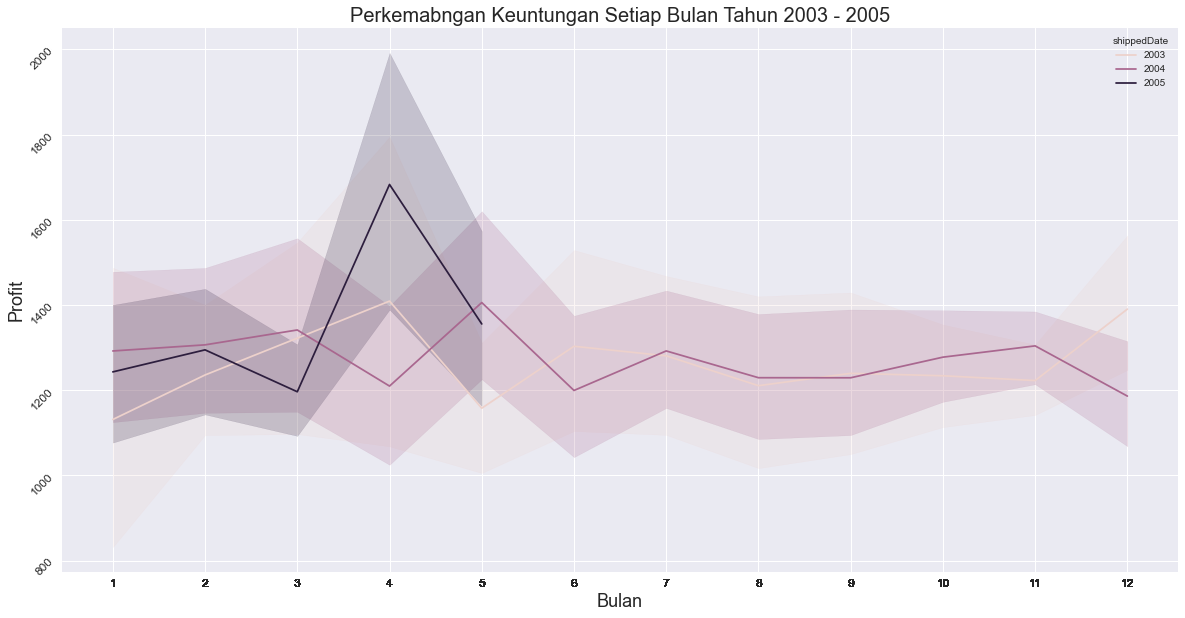

In [ ]:
# Line Plot Profit Each Month

plt.figure(figsize=(20,10))
sns.lineplot(data=tabel1, x=pd.DatetimeIndex(tabel1['shippedDate']).month, y='Profit', hue = pd.DatetimeIndex(tabel1['shippedDate']).year)
plt.title('Perkemabngan Keuntungan Setiap Bulan Tahun 2003 - 2005', size = 20)
plt.xlabel('Bulan', size = 18)
plt.ylabel('Profit', size = 18)
plt.xticks(pd.DatetimeIndex(tabel1['shippedDate']).month, size = 12)
plt.yticks(rotation = 45, size = 12)
plt.show()

## **Perbedaan Keuntungan Tiap Product**

In [ ]:
# Uji Perbandingan Nilai profitEach Antar Setiap Product Line (Normalitas)

from scipy.stats import shapiro

norm, pval = shapiro(tabel1['profitEach'])

if pval < 0.05 :
    print (f'Tolak H0 Karena P-Value ({pval} < 5%)')
    print ('DATA TIDAK BERDISTRIBUS NORMAL')
else :
    print (f'Gagal Tolak H0 Karena P-Value ({pval} > 5%)')
    print ('DATA BERDISTRIBUS NORMAL')

Tolak H0 Karena P-Value (2.3378079481592894e-38 < 5%)
DATA TIDAK BERDISTRIBUS NORMAL


In [ ]:
# Uji Perbandingan Nilai profitEach Antar Setiap Product Line (Kruskal Wallis)

from scipy.stats import kruskal

krus, pvalkrus = kruskal(
    tabel1[tabel1['productLine'] == 'Classic Cars']['profitEach'],
    tabel1[tabel1['productLine'] == 'Motorcycles']['profitEach'],
    tabel1[tabel1['productLine'] == 'Vintage Cars']['profitEach'],
    tabel1[tabel1['productLine'] == 'Planes']['profitEach'],
    tabel1[tabel1['productLine'] == 'Trucks and Buses']['profitEach'],
    tabel1[tabel1['productLine'] == 'Ships']['profitEach'],
    tabel1[tabel1['productLine'] == 'Trains']['profitEach']
) 

if pvalkrus < 0.05 :
    print (f'Tolak H0 Karena P-Value ({pval} < 5%)')
    print ('Terdapat Perbedaan Nilai Median Profit pada Setiap Product Yang Ada')
else :
    print (f'Gagal Tolak H0 Karena P-Value ({pval} > 5%)')
    print ('Tidak Terdapat Perbedaan Nilai Median Profit pada Setiap Product Yang Ada')

Tolak H0 Karena P-Value (2.3378079481592894e-38 < 5%)
Terdapat Perbedaan Nilai Median Profit pada Setiap Product Yang Ada


## **Hubungan Harga Jual dan Harga Beli**

<AxesSubplot:>

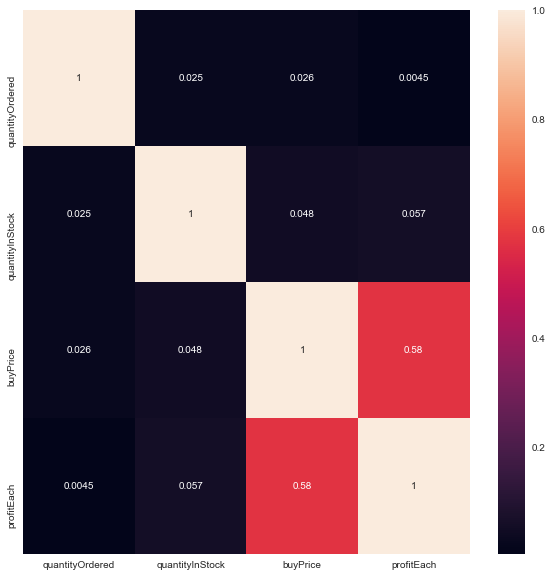

In [ ]:
# Korelasi

plt.figure(figsize=(10,10))
sns.heatmap(tabel1[['quantityOrdered', 'quantityInStock', 'buyPrice', 'profitEach']].corr('spearman'), annot=True)
	

C:\Users\achma\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='profitEach', ylabel='buyPrice'>

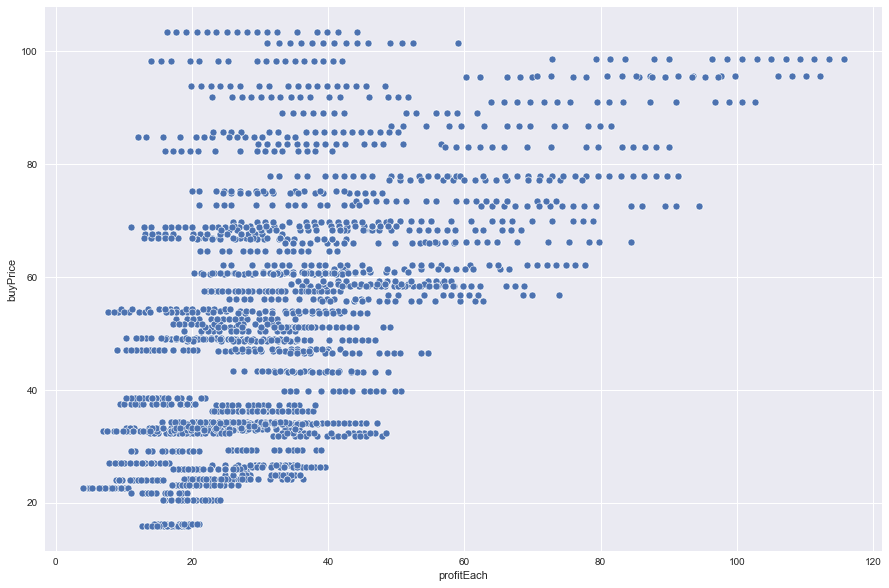

In [ ]:
# Korelasi Antara ProfitEach dan buyPrice

plt.figure(figsize=(15,10))
sns.scatterplot(tabel1['profitEach'], tabel1['buyPrice'])